# Segmentation de la clientèle pour l'analyse du marketing 

La segmentation des clients est le processus de regroupement des clients en fonction des caractéristiques communes pour mieux les comprendre et les servir.
Cela peut être fait grâce à des méthodes basées sur des régle, mais l'apprentissage automatique offre une segmantation plus précise et dynamique;

La segmentation des clients nous offre les moyens de repondre à des questions clés telles que :

- Quels sont les segments les plus rentables? 
- Ces clients sont-ils à risque de s'échouer 

Cela nous aide à adapter des stratégies marketing personnalisées et améliorer la fidélisation de la clientèle et satisfaction.  

In [1]:
# Librairies importées 

import os 
import warnings
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## I- Analyse et exploration des données 

In [3]:
#path = os.getcwd()
#chemin_repertoire = os.path.join(path, "Données")
#chemin_fichier = os.path.join(chemin_repertoire, "customer_segmentation_data.csv")

df= pd.read_csv("customer_segmentation_data.csv")
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [4]:
data = df.copy()

### 1. Informations 

In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df.shape

(1000, 8)

Nous indique la taille du DataFrame : ici, 1000 lignes (observations) et 8 colonnes (variables)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [8]:
df.dtypes

age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object

 - age, income, spending_score, membership_years, purchase_frequency sont de type int64,
 - gender, preferred_category sont de type object (souvent utilisé pour des données textuelles),
 - last_purchase_amount est de type float64.

In [9]:
df.isnull().sum()   

age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

Cette base de données est complète, sans valeurs manquantes, ce qui facilite l'analyse et garantit la cohérence des résultats.

In [9]:
df.nunique()

age                      52
gender                    3
income                  996
spending_score          100
membership_years         10
purchase_frequency       50
preferred_category        5
last_purchase_amount    994
dtype: int64

### 2. Statistiques 

In [11]:
df.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


- `Âge` : La moyenne et la médiane (45) sont proches, ce qui suggère que la répartition des âges est relativement symétrique. 
- `Revenu (income)` : La moyenne (88500) et la médiane (87845) sont très proches, laissant penser que la distribution des revenus est également assez équilibrée. Malgré une plage de valeurs allant de 30 004 à 149 973.
- `Score de dépense (spending_score)` : Avec un score moyen autour de 51 et une médiane de 50,  Peu de différence entre la moyenne et la médiane implique qu’il n’y a pas de concentration de valeurs extrêmes qui fausserait la moyenne.
- `Années de fidélité (membership_years)` : moyenne (5.47) et mediane (5), Les clients sont en moyenne membres depuis environ 5 ans. La médiane de 5 ans signifie que la moitié des clients sont membres depuis moins de 5 ans, et l’autre moitié depuis plus de 5 ans.
- `Fréquence d’achat (purchase_frequency)` : moyenne(26.59) et mediane (27),  La fréquence d’achat moyenne est légèrement inférieure à la médiane, signe d’une répartition quasi symétrique avec peut-être quelques clients achetant un peu moins souvent, sans pour autant tirer la moyenne vers le bas de manière significative.
- `Dernier montant d’achat (last_purchase_amount)` : La moyenne (492.35) et la mediane (491.60), la moyenne et la médiane soient presque égales indique une répartition homogène des montants de dernière transaction.

In [4]:
#stats= df.describe().T
#stats.to_csv('stats.csv')
tab = pd.read_csv('stats.csv')
tab

,Unnamed: 0,count,mean,std,min,25%,50%,75%,max
0,age,1000.0,43.78300,15.042213,18.0,30.0000,45.000,57.00,69.00
1,income,1000.0,88500.80000,34230.771122,30004.0,57911.7500,87845.500,116110.25,149973.00
2,spending_score,1000.0,50.68500,28.955175,1.0,26.0000,50.000,76.00,100.00
3,membership_years,1000.0,5.46900,2.855730,1.0,3.0000,5.000,8.00,10.00
4,purchase_frequency,1000.0,26.59600,14.243654,1.0,15.0000,27.000,39.00,50.00
5,last_purchase_amount,1000.0,492.34867,295.744253,10.4,218.7625,491.595,747.17,999.74


In [6]:
print(tab.to_markdown(index=False))

| Unnamed: 0           |   count |      mean |         std |     min |       25% |       50% |       75% |       max |
|:---------------------|--------:|----------:|------------:|--------:|----------:|----------:|----------:|----------:|
| age                  |    1000 |    43.783 |    15.0422  |    18   |    30     |    45     |     57    |     69    |
| income               |    1000 | 88500.8   | 34230.8     | 30004   | 57911.8   | 87845.5   | 116110    | 149973    |
| spending_score       |    1000 |    50.685 |    28.9552  |     1   |    26     |    50     |     76    |    100    |
| membership_years     |    1000 |     5.469 |     2.85573 |     1   |     3     |     5     |      8    |     10    |
| purchase_frequency   |    1000 |    26.596 |    14.2437  |     1   |    15     |    27     |     39    |     50    |
| last_purchase_amount |    1000 |   492.349 |   295.744   |    10.4 |   218.762 |   491.595 |    747.17 |    999.74 |


2.1 Distribution des données 

In [12]:
var_num = df.select_dtypes(include=['number']).columns
var_num


Index(['age', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'last_purchase_amount'],
      dtype='object')

In [13]:
var_cat = df.select_dtypes(include=['object']).columns
var_cat

Index(['gender', 'preferred_category'], dtype='object')

Visualisation des variables quantitatives 

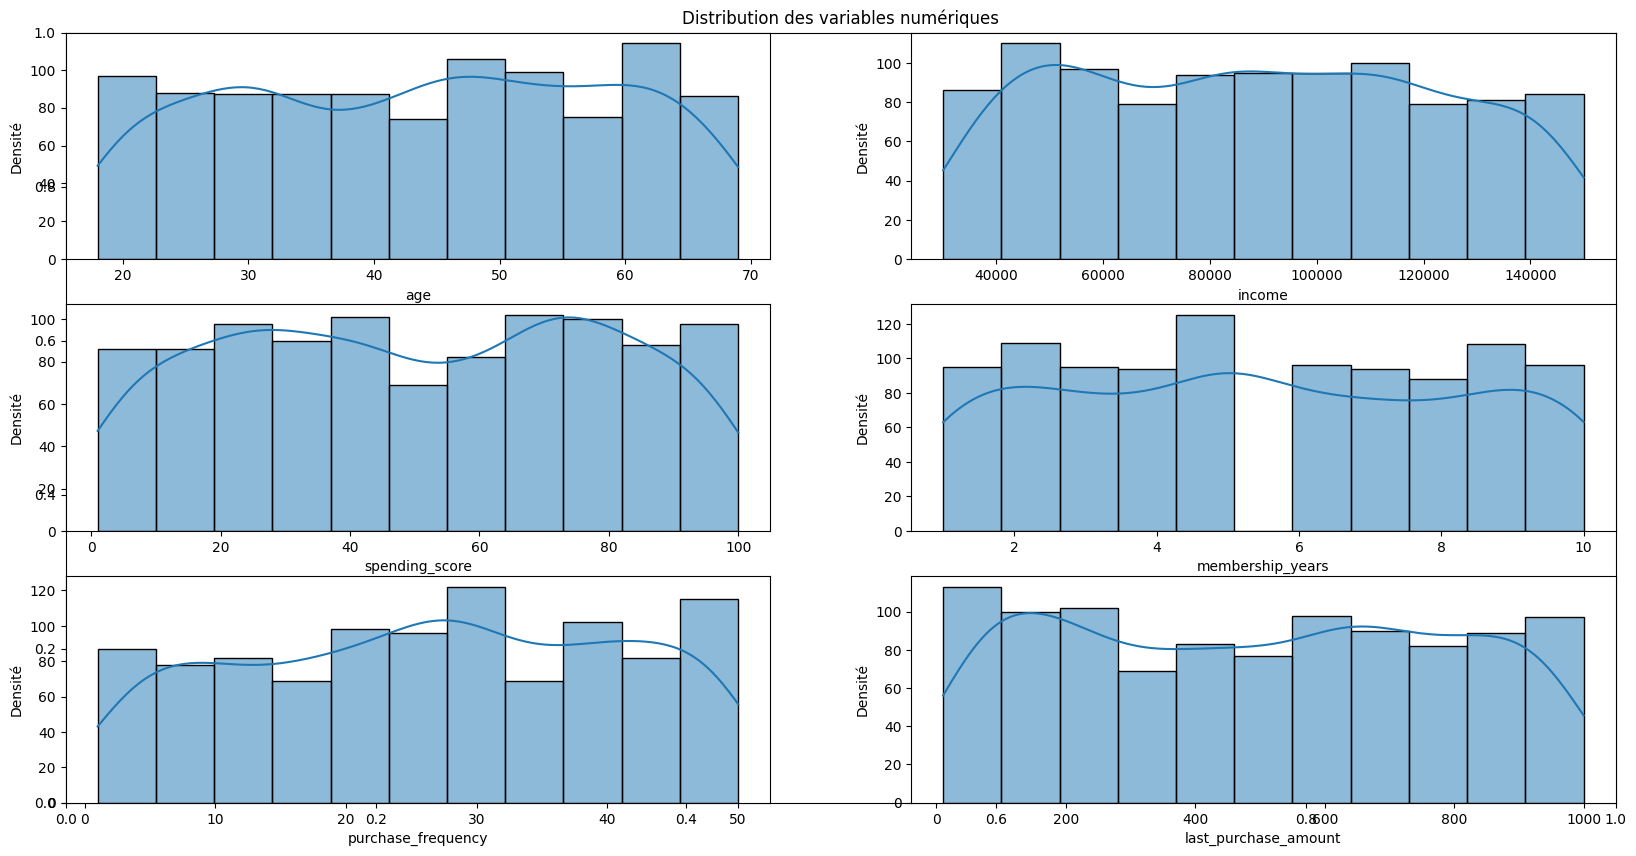

In [14]:

plt.figure(figsize=(20, 10))
plt.title('Distribution des variables numériques')

for var in var_num:
    plt.subplot(3, 2, list(var_num).index(var)+1)
    sns.histplot(df[var], kde=True)
    plt.xlabel(var) 
    plt.ylabel('Densité')
    

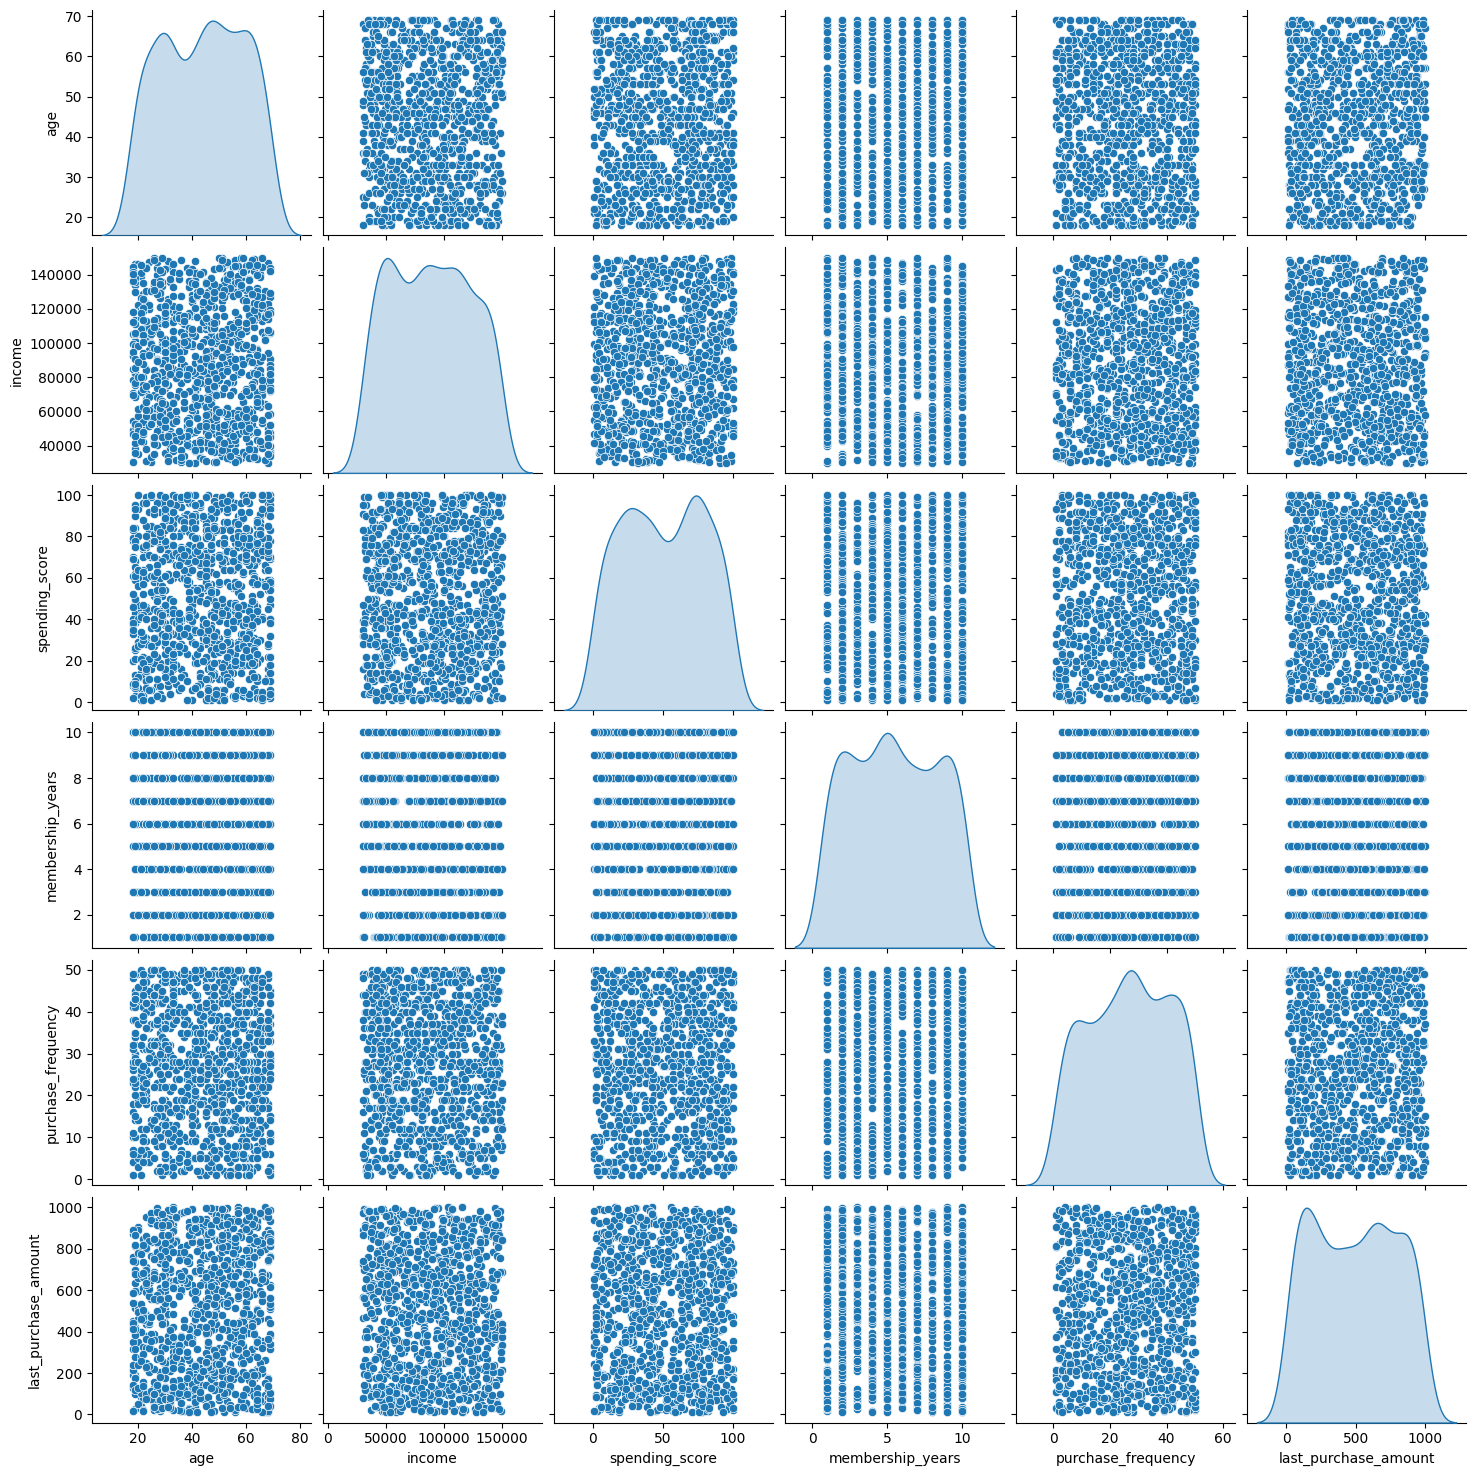

In [15]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

#### Visualisation des variables catégorielle 

C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\1049426628.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, ax=axes[0], palette='viridis')
C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\1049426628.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_category', data=df, ax=axes[1], palette='coolwarm')


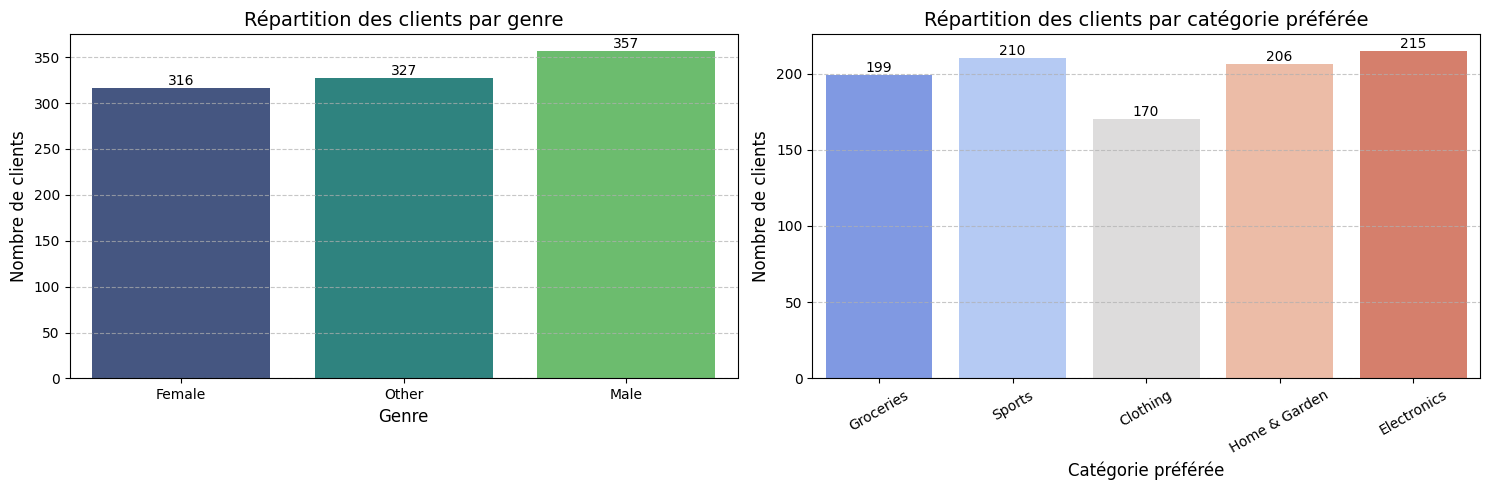

In [20]:
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='gender', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Répartition des clients par genre', fontsize=14)
axes[0].set_xlabel('Genre', fontsize=12)
axes[0].set_ylabel('Nombre de clients', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

sns.countplot(x='preferred_category', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title('Répartition des clients par catégorie préférée', fontsize=14)
axes[1].set_xlabel('Catégorie préférée', fontsize=12)
axes[1].set_ylabel('Nombre de clients', fontsize=12)
axes[1].tick_params(axis='x', rotation=30)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


- Répartition des clients par genre 
Les clients masculins (Male) constituent la majorité (357), suivis de près par les genres non spécifiés ou autres (Other) avec 327, et enfin les clientes féminines (Female) avec 316. La répartition est relativement équilibrée, mais une légère prédominance des clients masculins est notable.

- Répartition des clients par catégorie préférée 
Les catégories les plus populaires sont Electronics (215 clients) et Sports (210 clients), suivies de près par Home & Garden (206).
Les clients préfèrent moins Clothing (170 clients), qui est la catégorie la moins choisie.
Groceries (199 clients) a une popularité intermédiaire.

#### Visualisation croisée

C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\3543652699.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='preferred_category', y='age', palette="Set3")


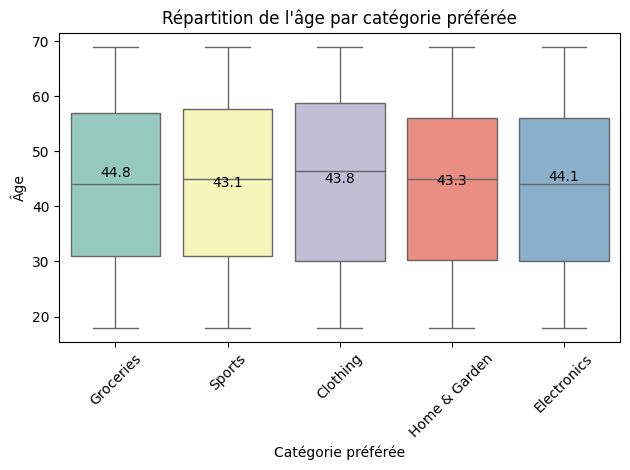

In [26]:

sns.boxplot(data=df, x='preferred_category', y='age', palette="Set3")
plt.title("Répartition de l'âge par catégorie préférée")
plt.xlabel("Catégorie préférée")
plt.ylabel("Âge")
plt.xticks(rotation=45)

mean_ages = df.groupby('preferred_category')['age'].mean()
for i, category in enumerate(mean_ages.index):
    plt.text(i, mean_ages[category], f"{mean_ages[category]:.1f}", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


- Groceries : Les clients ayant cette préférence ont un âge médian légèrement supérieur (autour de 45 ans) avec une moyenne de 44.8. Cela indique une popularité plus importante parmi les clients plus âgés.
- Sports : Cette catégorie attire légèrement des clients plus jeunes (médiane proche de 43 ans, moyenne de 43.1).
- Clothing : Répartition similaire à Sports, avec une médiane d'âge légèrement plus élevée (43.8 ans).
- Home & Garden : Médiane proche de 43 ans, avec une moyenne de 43.3. La répartition des âges est homogène, sans forte prédominance des clients jeunes ou âgés.
- Electronics : Médiane d'environ 44 ans, et une moyenne de 44.1. Cette catégorie attire des clients d'âge intermédiaire.

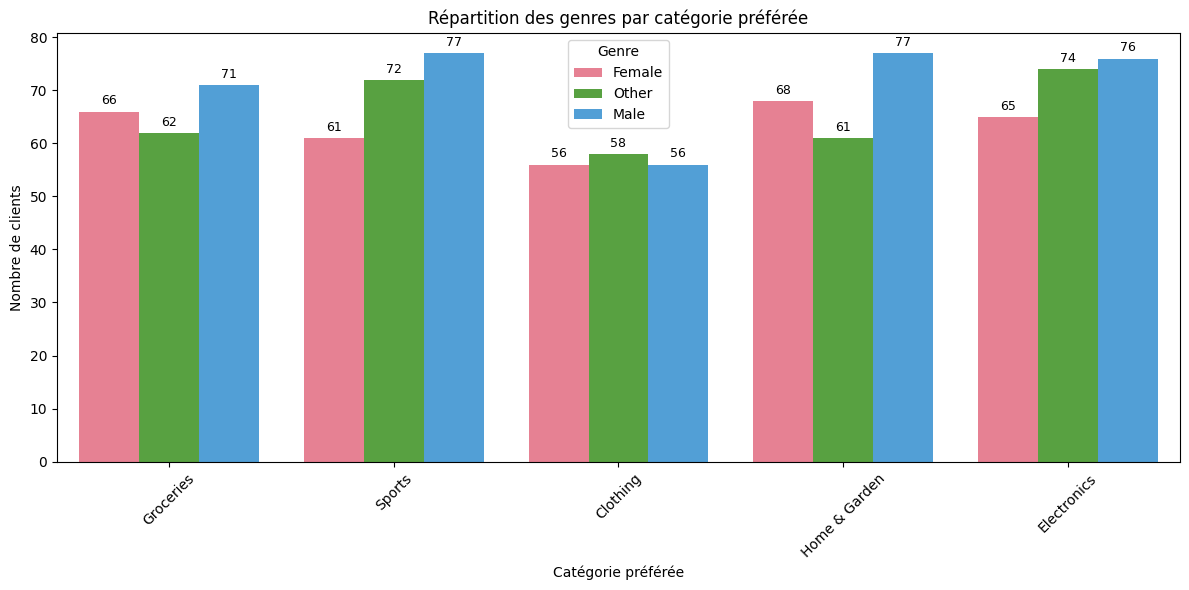

In [25]:
# Countplot avec annotations
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='preferred_category', hue='gender', palette="husl")
plt.title("Répartition des genres par catégorie préférée")
plt.xlabel("Catégorie préférée")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)

# Ajouter les chiffres sur les barres
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.legend(title="Genre")
plt.tight_layout()
plt.show()

Ce graphique montre la distribution des clients selon leur genre (Female, Male, Other) pour chaque catégorie préférée (Groceries, Sports, Clothing, Home & Garden, Electronics).

- Groceries :
Les hommes (71) sont légèrement plus nombreux à préférer cette catégorie, suivis par les femmes (66) et les autres genres (62).
Cette répartition est relativement équilibrée.
- Sports :
La catégorie est la plus populaire parmi les hommes (77), suivie par les autres genres (72) et les femmes (61).
Cela indique une préférence notable des hommes pour les produits sportifs.
- Clothing :
La répartition est quasiment équivalente entre les trois genres, avec un léger avantage pour les autres genres (58), suivis par les femmes et les hommes (56 chacun).
Cette égalité peut indiquer une absence de biais de genre pour cette catégorie.
- Home & Garden :
Les hommes (77) dominent cette catégorie, suivis par les femmes (68) et les autres genres (61).
Les femmes montrent un intérêt plus élevé pour cette catégorie comparée à d'autres.
- Electronics :
La répartition est équilibrée entre les hommes (76) et les autres genres (74), mais les femmes (65) préfèrent légèrement moins cette catégorie.

`Conclusion`: 

- Les hommes montrent une forte préférence pour les catégories Sports, Home & Garden, et Electronics.
- Les autres genres ont une présence notable et équilibrée dans toutes les catégories, avec une préférence particulière pour Sports et Electronics.
- Les femmes sont légèrement moins représentées dans les catégories technologiques (Electronics) et sportives (Sports), mais ont un intérêt important pour Home & Garden.

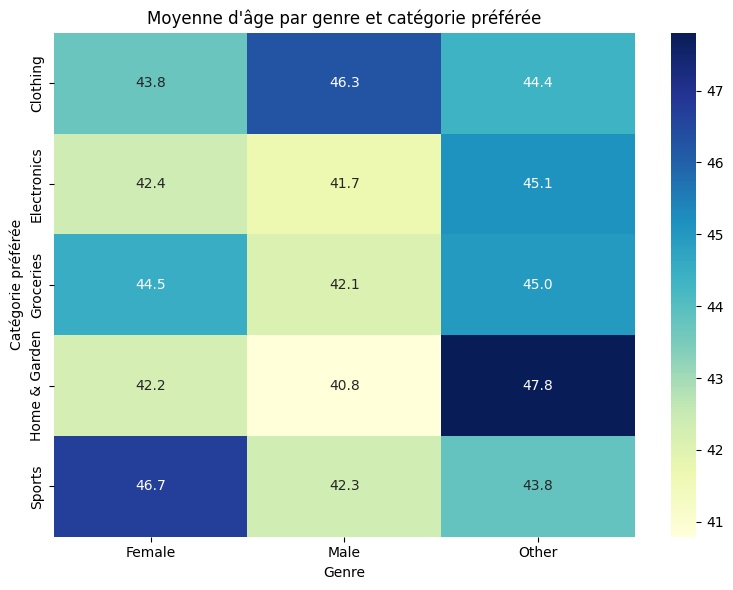

In [22]:
# Croisement âge, genre et catégorie préférée (Heatmap de moyennes d'âge)
heatmap_data = df.groupby(['preferred_category', 'gender'])['age'].mean().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True)
plt.title("Moyenne d'âge par genre et catégorie préférée")
plt.xlabel("Genre")
plt.ylabel("Catégorie préférée")
plt.tight_layout()
plt.show()

- Cette heatmap représente la moyenne d'âge des clients selon leur genre (Female, Male, Other) et leur catégorie préférée (Clothing, Electronics, Groceries, Home & Garden, Sports). 
- Âge le plus élevé : Home & Garden pour les autres genres (47.8 ans).

Âge le plus bas : Home & Garden pour les hommes (40.8 ans).

Les femmes ont des âges moyens plus élevés que les hommes pour presque toutes les catégories, sauf Electronics.

Les autres genres ont généralement une moyenne d'âge élevée, particulièrement pour Home & Garden et Electronics.

#### Correlation des variables numériques


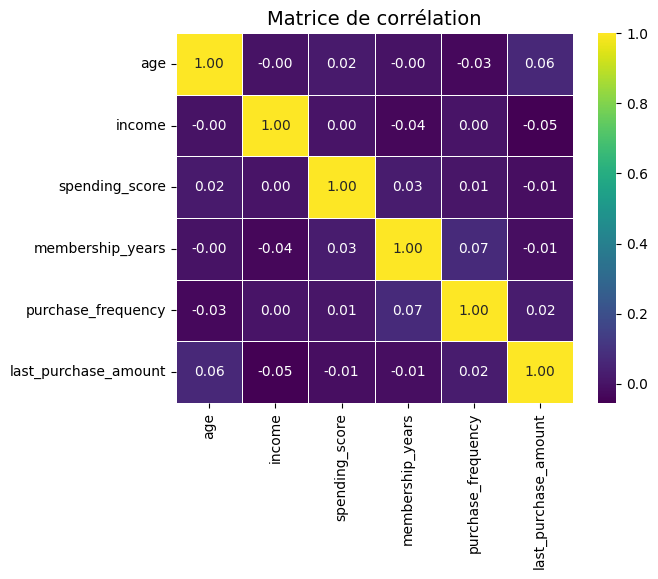

In [28]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation', fontsize=14)
plt.show()

- La plupart des corrélations sont proches de 0, ce qui indique que les variables sont relativement indépendantes les unes des autres.

- Âge et Dernier Montant d’Achat (Last Purchase Amount) : Corrélation faible positive (0.06). Cela suggère qu’un âge légèrement plus élevé est associé à des montants d’achat un peu plus importants, mais cette relation est très faible.
- Fréquence d’Achat (Purchase Frequency) et Nombre d’Années de Fidélité (Membership Years) : Corrélation positive faible (0.07), indiquant que les clients fidèles tendent légèrement à avoir une fréquence d’achat plus élevée.
- Score de Dépense (Spending Score) et Nombre d’Années de Fidélité (Membership Years) : Corrélation faible positive (0.03), montrant que les clients avec plus d'années de fidélité ont un score de dépense légèrement plus élevé.

- Les relations entre les variables sont globalement très faibles, ce qui peut indiquer que les variables mesurent des aspects distincts du comportement ou des caractéristiques des clients.

## II- Prétraitement des données 

In [29]:
# verification et suppression des doublons

df.drop_duplicates(inplace=True)

-  Standardisation des données

In [30]:
cols_to_scale = ['age', 'income', 'spending_score', 'membership_years','purchase_frequency', 'last_purchase_amount']
data_to_scale = df[cols_to_scale]

# standardisation des données numériques
scaler = StandardScaler()
scaled_data =scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=cols_to_scale)

# remettre les index d'origine
scaled_df.index = df.index

# remplacement des valeurs originales par les valeurs standardisées
df[cols_to_scale]= scaled_df 

print(df.head())

        age  gender    income  spending_score  membership_years  \
0 -0.384644  Female  0.316868        1.358468         -0.865010   
1 -1.515362  Female -0.282016        0.321865         -1.215358   
2  1.078639  Female  1.112778       -0.714738         -1.215358   
3 -0.251618   Other -1.210096        0.805613          1.237080   
4  1.411203  Female  1.523374       -1.025718         -0.865010   

   purchase_frequency preferred_category  last_purchase_amount  
0           -0.182348          Groceries             -1.281540  
1            1.082005             Sports             -1.523763  
2            0.098620           Clothing             -0.230005  
3           -1.516943      Home & Garden              1.690080  
4           -0.112106        Electronics             -0.491443  


- traitement des var catégorielles

In [31]:
#df.select_dtypes('object').columns
df.select_dtypes('object').nunique()

gender                3
preferred_category    5
dtype: int64

In [32]:
# conversion des variables catégorielles en variables numériques utilisant one-hot encoding 
df= pd.get_dummies(df, columns=['gender', 'preferred_category'], drop_first=True)


In [33]:
df

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,False,False,False,True,False,False
1,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,False,False,False,False,False,True
2,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,False,False,False,False,False,False
3,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,False,True,False,False,True,False
4,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,True,False,False,False,False,False
996,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,False,True,False,True,False,False
997,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,True,False,False,False,False,True
998,-1.448849,0.736379,0.425525,0.536383,1.222489,0.043341,False,False,True,False,False,False


## III-  Construction de modèle et segmentation de la clientèle 

determinons le nombre de classe  

utilisation de la methode `elbow` et de la methode `silhouette` pour determiner le nombre de classe optimal. 

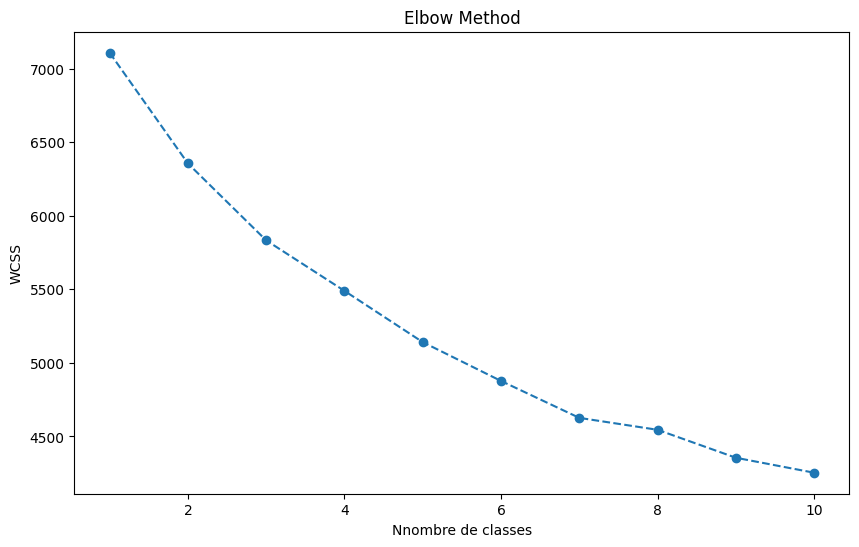

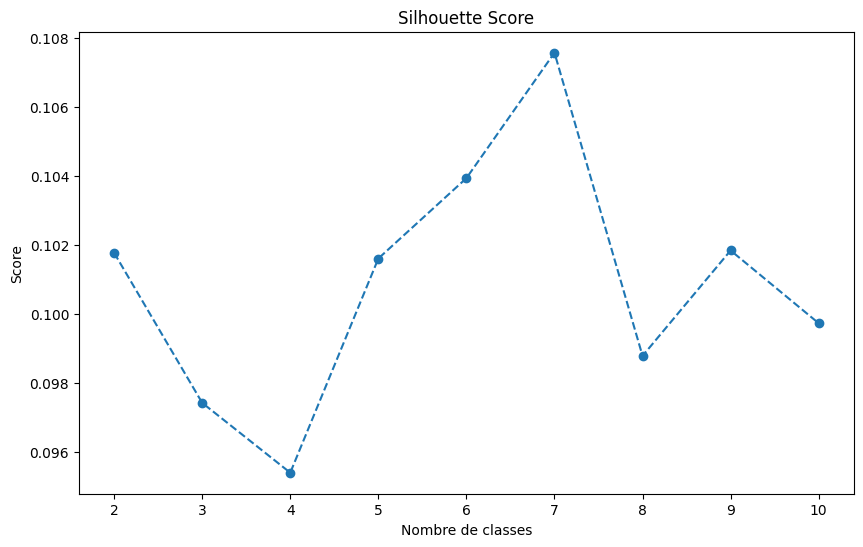

In [34]:
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Nnombre de classes')
plt.ylabel('WCSS')
plt.show() 

# Score de silhouette pour valider le nombre de classes 
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Nombre de classes')
plt.ylabel('Score')
plt.show()
# choix du nombre de clusters  

nombre de choix de classe est de 3  d'apres elbow et silhouette score analyse 

In [35]:
kmeans= KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# ajout de la colonne cluster au dataframe
df['cluster']= kmeans.labels_

Visualisation des classes segmenter 

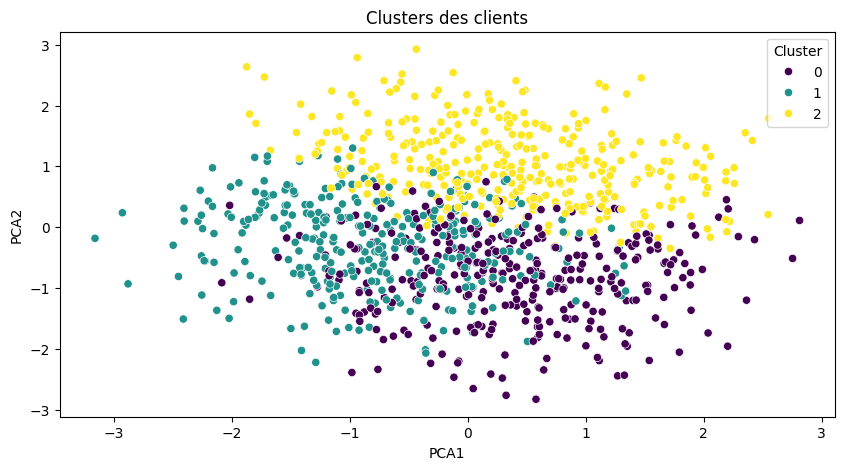

In [36]:
# performance ACP pour diminuer la dimensionnalité des données à 2 dimensions 
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df.drop('cluster', axis=1, errors='ignore')) 

# ajout des composantes principales au dataframe
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# initialisation K-means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df.drop(['cluster', 'PCA1', 'PCA2'], axis=1, errors='ignore'))

# ajout des labels au dataframe
df['cluster'] = labels

# visualisation des clusters base sur les composantes principales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='cluster', palette='viridis')
plt.title('Clusters des clients')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

Profile et interpretation des classes 

In [37]:
label_0 = df[df['cluster'] == 0]
label_1 = df[df['cluster'] == 1]
label_2 = df[df['cluster'] == 2]

In [38]:
print(f"Label 0 shape est : {label_0.shape}")
print(f"Label 1 shape est : {label_1.shape}")
print(f"Label 2 shape est : {label_2.shape}")

Label 0 shape est : (325, 15)
Label 1 shape est : (325, 15)
Label 2 shape est : (350, 15)


- Label 0 : Ce label contient 325 échantillons (lignes), chacun avec 15 caractéristiques (colonnes).
- Label 1 : Identique au label 0 en termes de taille, soit 325 échantillons avec 15 caractéristiques.
- Label 2 : Contient légèrement plus d'échantillons (350 échantillons), mais toujours avec 15 caractéristiques.

In [39]:
data["Clusters"] = labels

In [40]:
segment1 = data.loc[(data['Clusters'] == 0)]
segment2 = data.loc[(data['Clusters'] == 1)]
segment3 = data.loc[(data['Clusters'] == 2)]


In [41]:
segment1.head(2)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
1,2,21,Female,78852,60,2,42,Sports,41.93,0
5,6,31,Other,57305,24,3,30,Home & Garden,86.85,0


In [42]:
segment2.head(2)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
0,1,38,Female,99342,90,3,24,Groceries,113.53,1
2,3,60,Female,126573,30,2,28,Clothing,424.36,1


In [43]:
segment3.head(2)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,2
7,8,43,Male,108115,94,9,27,Groceries,734.56,2


## Recommadations 

##### Profile des classes

In [44]:
# calcul des moyennes des variables numeriques par cluster
num_cols = data.select_dtypes(include=['number'])
cluster_profile = num_cols.groupby(data['Clusters']).mean()


# ajout de la taille de chaque au profile 

cluster_profile['cluster_size'] = data['Clusters'].value_counts()
cluster_profile

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,Clusters,cluster_size
Clusters,,,,,,,,,
0,504.538462,30.181538,90800.246154,43.046154,6.073846,34.578462,449.428185,0.0,325
1,494.301538,47.920000,97625.316923,55.055385,4.790769,17.916923,249.289200,1.0,325
2,502.505714,52.571429,77892.834286,53.720000,5.537143,27.242857,757.901486,2.0,350


Visualisation des caractéristiques des classes 

C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\3106048268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters', y='age', data=data, palette='viridis')


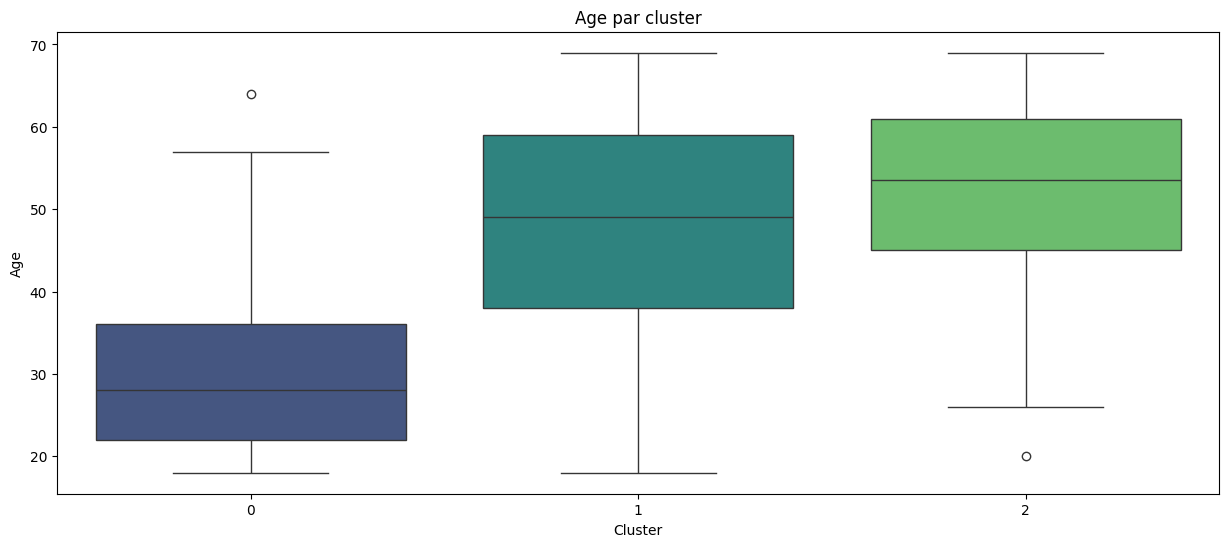

C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\3106048268.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters', y='income', data=data, palette='viridis')


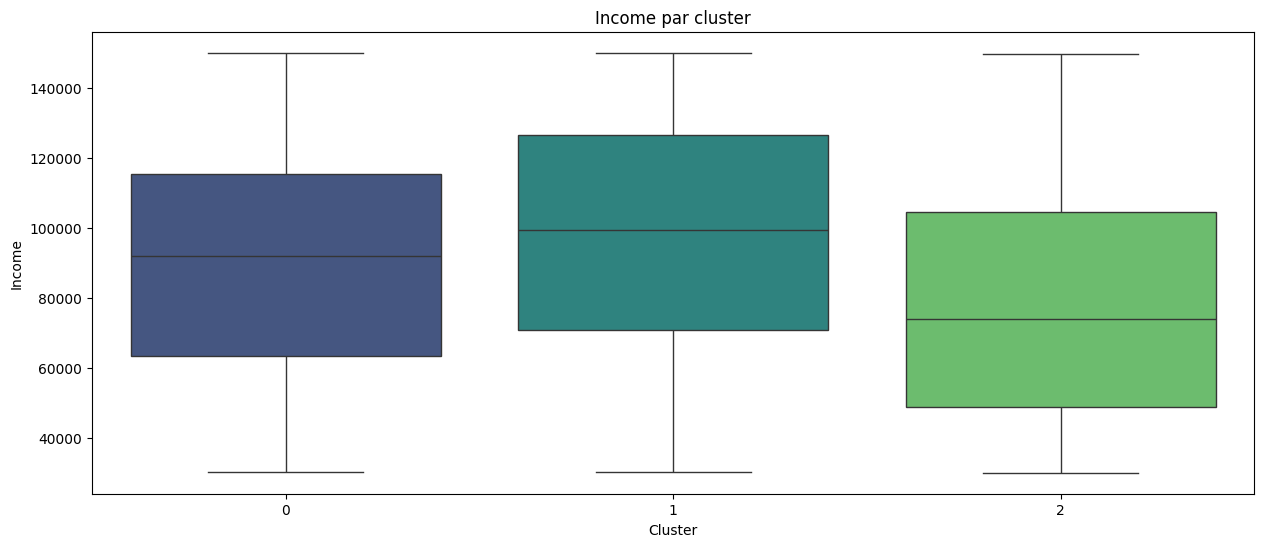

C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\3106048268.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters', y='spending_score', data=data, palette='magma')


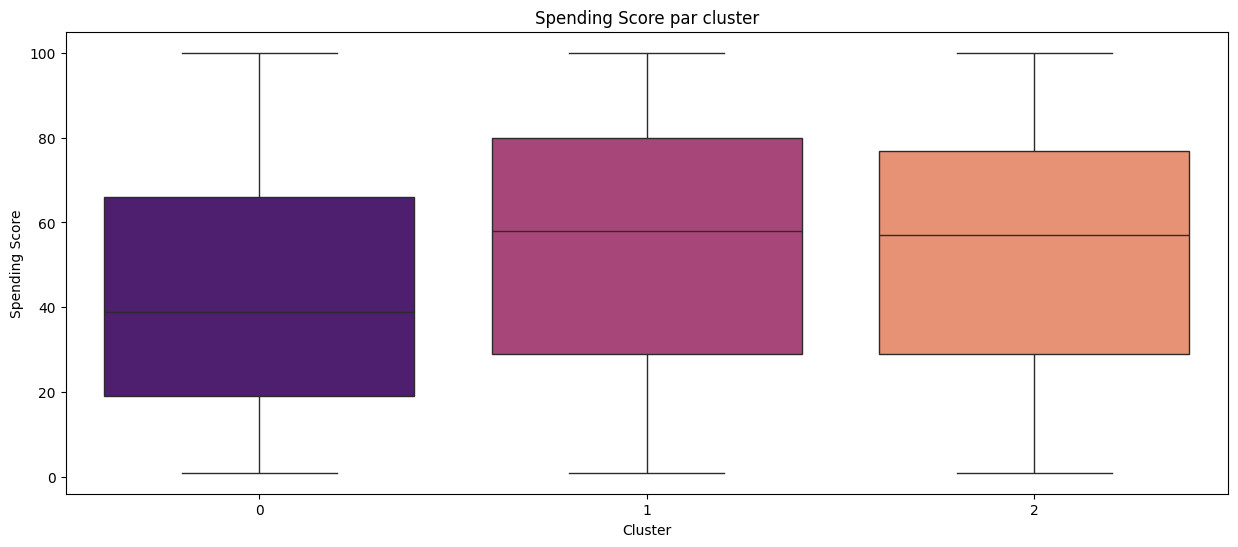

C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\3106048268.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters', y='membership_years', data=data, palette='viridis')


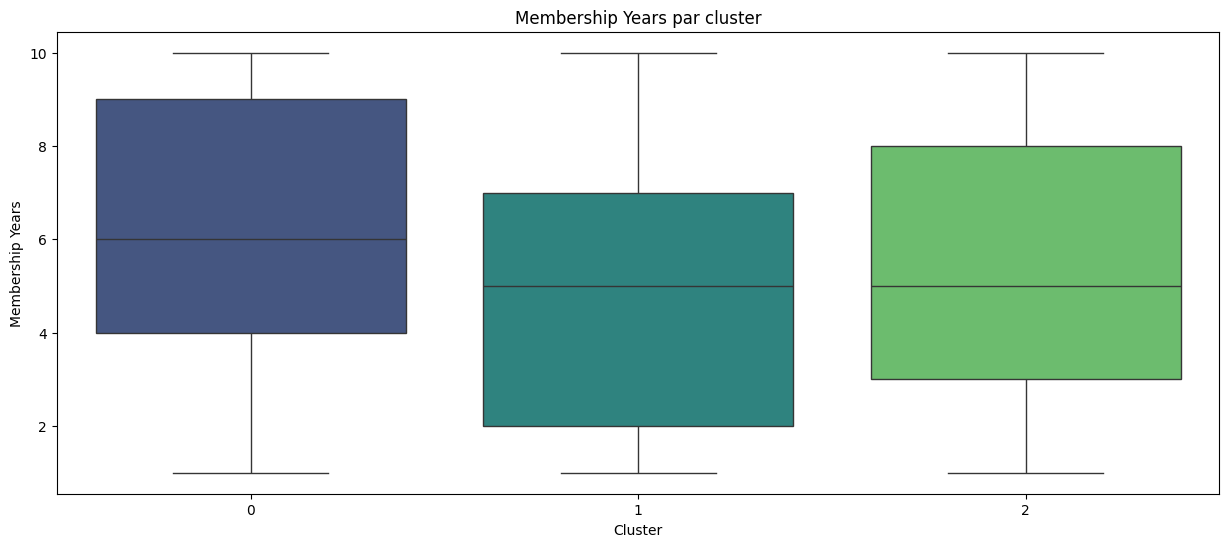

C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\3106048268.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters', y='purchase_frequency', data=data, palette='viridis')


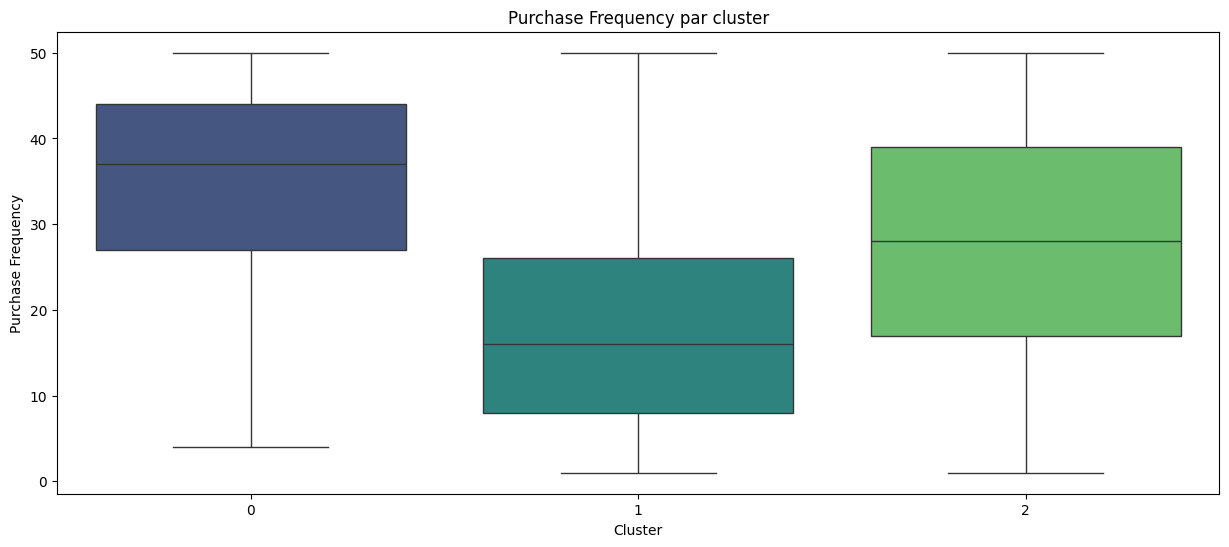

C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\3106048268.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters', y='last_purchase_amount', data=data, palette='viridis')


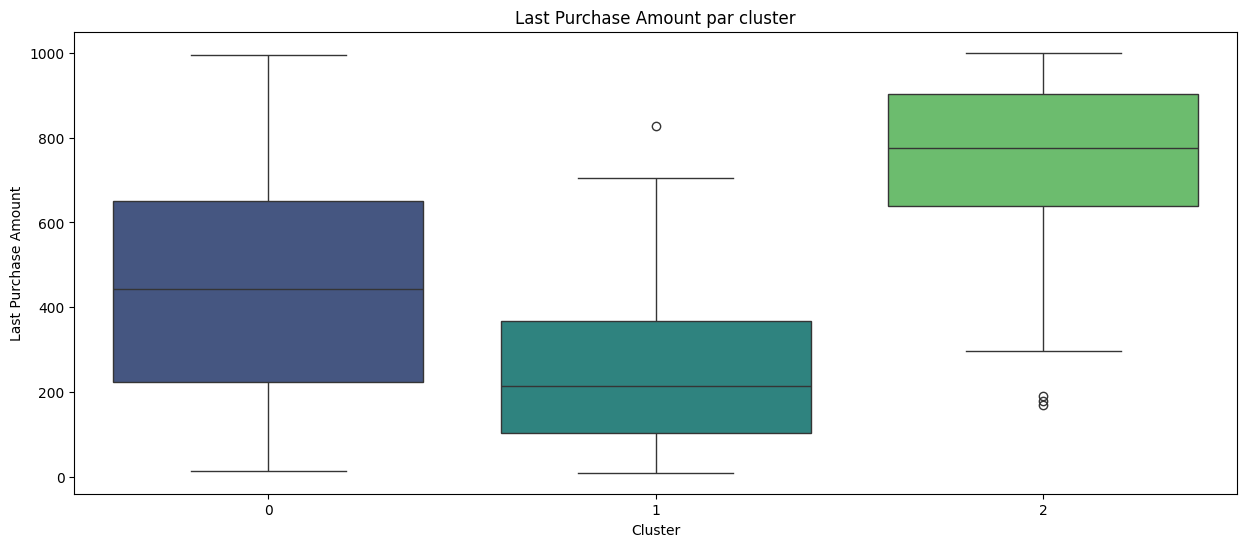

In [45]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(x='Clusters', y='age', data=data, palette='viridis')
plt.title('Age par cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Clusters', y='income', data=data, palette='viridis')
plt.title('Income par cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Clusters', y='spending_score', data=data, palette='magma')
plt.title('Spending Score par cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Clusters', y='membership_years', data=data, palette='viridis')
plt.title('Membership Years par cluster')
plt.xlabel('Cluster')
plt.ylabel('Membership Years')
plt.show()


plt.figure(figsize=(15, 6))
sns.boxplot(x='Clusters', y='purchase_frequency', data=data, palette='viridis')
plt.title('Purchase Frequency par cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchase Frequency')
plt.show()


plt.figure(figsize=(15, 6))
sns.boxplot(x='Clusters', y='last_purchase_amount', data=data, palette='viridis')
plt.title('Last Purchase Amount par cluster')
plt.xlabel('Cluster')
plt.ylabel('Last Purchase Amount')
plt.show()

- L’âge moyen est plus élevé dans le segment 3 (cluster 2) que dans les deux autres segments.
- Les clients des segments 1 (cluster 0) et 2 (cluster 1) ont un revenu moyen supérieur à 80 000, ce qui est plus élevé que dans le segment 3 (cluster 2).
- Le score de dépense est plus élevé dans les segments 2 (cluster 1) et 3 (cluster 2).
- Les clients du segment 1 (cluster 0) ont une ancienneté (années d'adhésion) plus élevée.
- Les clients des segments 1 (cluster 0) et 3 (cluster 2) ont une fréquence d’achat plus élevée.
- Les clients du segment 3 (cluster 2) ont un montant du dernier achat nettement plus élevé.

In [46]:
s = segment1['preferred_category'].fillna('No')
counts = s.value_counts() 
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
preferred_category,,,
Home & Garden,72,0.221538,22.2%
Electronics,70,0.215385,21.5%
Sports,67,0.206154,20.6%
Groceries,65,0.200000,20.0%
Clothing,51,0.156923,15.7%


In [47]:
s = segment2['preferred_category'].fillna('No')
counts = s.value_counts() 
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
preferred_category,,,
Groceries,71,0.218462,21.8%
Sports,69,0.212308,21.2%
Electronics,68,0.209231,20.9%
Clothing,60,0.184615,18.5%
Home & Garden,57,0.175385,17.5%


In [48]:
s = segment3['preferred_category'].fillna('No')
counts = s.value_counts() 
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
preferred_category,,,
Home & Garden,77,0.220000,22.0%
Electronics,77,0.220000,22.0%
Sports,74,0.211429,21.1%
Groceries,63,0.180000,18.0%
Clothing,59,0.168571,16.9%


### information des segments 

##### Cluster 1

In [57]:
#segment1

In [53]:
mean_values1 = segment1.select_dtypes(include=['number']).mean()
mean_values1 

id                        504.538462
age                        30.181538
income                  90800.246154
spending_score             43.046154
membership_years            6.073846
purchase_frequency         34.578462
last_purchase_amount      449.428185
Clusters                    0.000000
dtype: float64

In [58]:
# Calculer la mode des variables catégorielles
mode_gender = segment1['gender'].mode()[0]  # Mode pour la colonne 'gender'
mode_category = segment1['preferred_category'].mode()[0]

print("\nMode des variables catégorielles dans le segment :")
print(f"Genre le plus fréquent : {mode_gender}")
print(f"Catégorie préférée la plus fréquente : {mode_category}")


Mode des variables catégorielles dans le segment :
Genre le plus fréquent : Male
Catégorie préférée la plus fréquente : Home & Garden


##### Cluster 2

In [59]:
mean_values2 = segment2.select_dtypes(include=['number']).mean()
mean_values2 

id                        494.301538
age                        47.920000
income                  97625.316923
spending_score             55.055385
membership_years            4.790769
purchase_frequency         17.916923
last_purchase_amount      249.289200
Clusters                    1.000000
dtype: float64

In [60]:
# Calculer la mode des variables catégorielles
mode_gender2 = segment2['gender'].mode()[0]  # Mode pour la colonne 'gender'
mode_category2 = segment2['preferred_category'].mode()[0]

print("\nMode des variables catégorielles dans le segment :")
print(f"Genre le plus fréquent : {mode_gender2}")
print(f"Catégorie préférée la plus fréquente : {mode_category2}")


Mode des variables catégorielles dans le segment :
Genre le plus fréquent : Female
Catégorie préférée la plus fréquente : Groceries


##### Cluster 3

In [61]:
mean_values3 = segment3.select_dtypes(include=['number']).mean()
mean_values3

id                        502.505714
age                        52.571429
income                  77892.834286
spending_score             53.720000
membership_years            5.537143
purchase_frequency         27.242857
last_purchase_amount      757.901486
Clusters                    2.000000
dtype: float64

In [62]:
# Calculer la mode des variables catégorielles
mode_gender3 = segment3['gender'].mode()[0]  # Mode pour la colonne 'gender'
mode_category3 = segment3['preferred_category'].mode()[0]

print("\nMode des variables catégorielles dans le segment :")
print(f"Genre le plus fréquent : {mode_gender3}")
print(f"Catégorie préférée la plus fréquente : {mode_category3}")


Mode des variables catégorielles dans le segment :
Genre le plus fréquent : Other
Catégorie préférée la plus fréquente : Electronics


##### Résumé

cluster1 

age                        30.181538
income                  90800.246154
spending_score             43.046154
membership_years            6.073846
purchase_frequency         34.578462
last_purchase_amount      449.428185

Mode des variables catégorielles dans le segment :
Genre le plus fréquent : Male
Catégorie préférée la plus fréquente : Home & Garden

cluster2

age                        47.920000
income                  97625.316923
spending_score             55.055385
membership_years            4.790769
purchase_frequency         17.916923
last_purchase_amount      249.289200

Mode des variables catégorielles dans le segment :
Genre le plus fréquent : Female
Catégorie préférée la plus fréquente : Groceries

cluster 3

age                        52.571429
income                  77892.834286
spending_score             53.720000
membership_years            5.537143
purchase_frequency         27.242857
last_purchase_amount      757.901486

Mode des variables catégorielles dans le segment :
Genre le plus fréquent : Other
Catégorie préférée la plus fréquente : Electronics


C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\986716131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=segment1, ax=axes[0], palette='viridis')
C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\986716131.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=segment2, ax=axes[1], palette='coolwarm')
C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\986716131.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=segment3, ax=axes[2], palette='cividis')


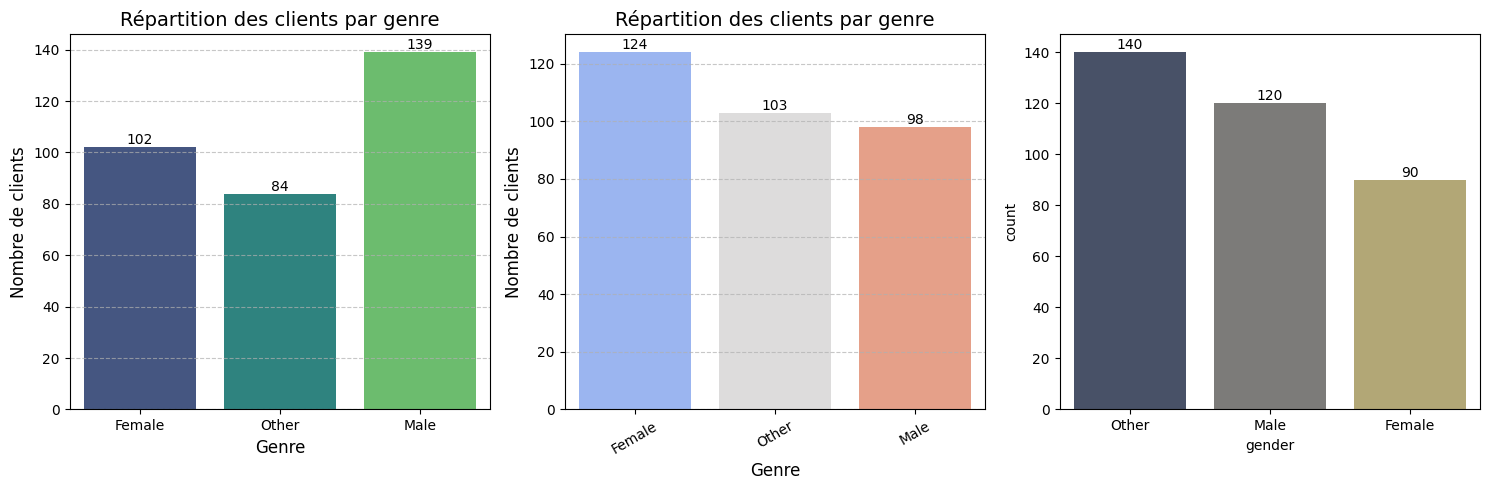

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='gender', data=segment1, ax=axes[0], palette='viridis')
axes[0].set_title('Répartition des clients par genre', fontsize=14)
axes[0].set_xlabel('Genre', fontsize=12)
axes[0].set_ylabel('Nombre de clients', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

sns.countplot(x='gender', data=segment2, ax=axes[1], palette='coolwarm')
axes[1].set_title('Répartition des clients par gender', fontsize=14)
axes[1].set_xlabel('Genre', fontsize=12)
axes[1].set_ylabel('Nombre de clients', fontsize=12)
axes[1].tick_params(axis='x', rotation=30)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


sns.countplot(x='gender', data=segment3, ax=axes[2], palette='cividis')
axes[1].set_title('Répartition des clients par genre', fontsize=14)
axes[1].set_xlabel('Genre', fontsize=12)
axes[1].set_ylabel('Nombre de clients', fontsize=12)
axes[1].tick_params(axis='x', rotation=30)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for p in axes[2].patches:
    axes[2].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\1616311882.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_category', data=segment1, ax=axes[0], palette='coolwarm')
C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\1616311882.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_category', data=segment2, ax=axes[1], palette='viridis')
C:\Users\AFOLABI\AppData\Local\Temp\ipykernel_50500\1616311882.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_category', data=segment3, ax=axes[2], p

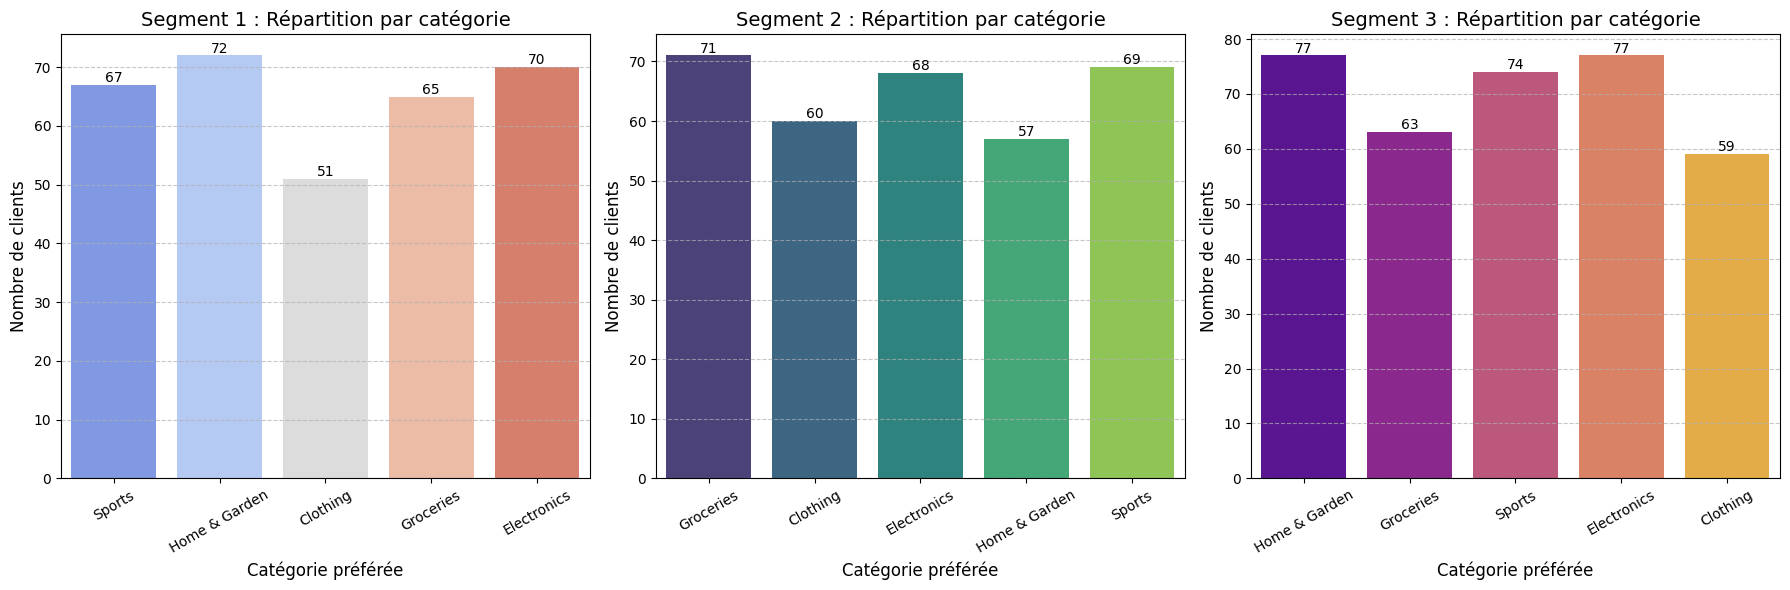

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Crée trois sous-graphiques côte à côte

# Fonction pour ajouter les effectifs sur les barres
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Affiche l'effectif (hauteur de la barre)
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position au-dessus de la barre
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Graphique pour segment 1
sns.countplot(x='preferred_category', data=segment1, ax=axes[0], palette='coolwarm')
axes[0].set_title('Segment 1 : Répartition par catégorie', fontsize=14)
axes[0].set_xlabel('Catégorie préférée', fontsize=12)
axes[0].set_ylabel('Nombre de clients', fontsize=12)
axes[0].tick_params(axis='x', rotation=30)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
add_counts(axes[0])  # Ajouter les effectifs

# Graphique pour segment 2
sns.countplot(x='preferred_category', data=segment2, ax=axes[1], palette='viridis')
axes[1].set_title('Segment 2 : Répartition par catégorie', fontsize=14)
axes[1].set_xlabel('Catégorie préférée', fontsize=12)
axes[1].set_ylabel('Nombre de clients', fontsize=12)
axes[1].tick_params(axis='x', rotation=30)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
add_counts(axes[1])  # Ajouter les effectifs

# Graphique pour segment 3
sns.countplot(x='preferred_category', data=segment3, ax=axes[2], palette='plasma')
axes[2].set_title('Segment 3 : Répartition par catégorie', fontsize=14)
axes[2].set_xlabel('Catégorie préférée', fontsize=12)
axes[2].set_ylabel('Nombre de clients', fontsize=12)
axes[2].tick_params(axis='x', rotation=30)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
add_counts(axes[2])  # Ajouter les effectifs

# Ajustement des espacements
plt.tight_layout()
plt.show()


In [87]:

# Création du DataFrame avec toutes les colonnes
cluster_summary = pd.DataFrame({
    "Cluster": ["Cluster 1", "Cluster 2", "Cluster 3"],
    "Age": [30, 48, 52],
    "Income": [90800.246154, 97625.316923, 77892.834286],
    "Spending Score": [43.046154, 55.055385, 53.720000],
    "Membership Years": [6.073846, 4.790769, 5.537143],
    "Purchase Frequency": [34.578462, 17.916923, 27.242857],
    "Last Purchase Amount": [449.428185, 249.289200, 757.901486],
    "Gender (Mode)": ["Male", "Female", "Other"],
    "Preferred Category (Mode)": ["Home & Garden", "Groceries", "Electronics"]
})

cluster_summary


,Cluster,Age,Income,Spending Score,Membership Years,Purchase Frequency,Last Purchase Amount,Gender (Mode),Preferred Category (Mode)
0,Cluster 1,30,90800.246154,43.046154,6.073846,34.578462,449.428185,Male,Home & Garden
1,Cluster 2,48,97625.316923,55.055385,4.790769,17.916923,249.289200,Female,Groceries
2,Cluster 3,52,77892.834286,53.720000,5.537143,27.242857,757.901486,Other,Electronics


##### Segment1 (cluster 1) 
Caractéristiques principales :

- Âge moyen : 30 ans — Ce cluster est composé de jeunes clients.
-  Revenu moyen : 90,800 — Les membres de ce cluster ont un revenu moyen relativement élevé.
- Score de dépense : 43 — Ces clients dépensent de manière modérée, mais ne sont pas les plus actifs.
- Années d'adhésion : 6 ans — Ils ont une fidélité notable, étant membres depuis un bon moment.
- Fréquence d'achat : 34 — Ces clients achètent fréquemment.
- Dernier montant d'achat : 449 — Les montants dépensés récemment sont dans une fourchette moyenne.
- Genre dominant : Male — Les hommes dominent ce cluster.
- Catégorie préférée : Home & Garden — Ces clients sont intéressés par des produits liés à la maison.

`Insights`:

- Ces clients jeunes avec un revenu élevé et une fréquence d'achat élevée sont intéressés par des produits pour la maison.
- Stratégie marketing : Proposer des promotions sur des articles Home & Garden et leur offrir des abonnements ou des programmes de fidélité pour renforcer leur engagement.


##### Segment2 (Cluster2)
Caractéristiques principales :

- Âge moyen : 48 ans — Ce cluster est composé de clients d'âge moyen à mature.
- Revenu moyen : 97,625 — Ils ont le revenu moyen le plus élevé parmi les clusters.
- Score de dépense : 55 — Ce groupe dépense activement.
- Années d'adhésion : 4.8 ans — Ils sont membres depuis un peu moins longtemps que les autres clusters.
- Fréquence d'achat : 18 — Leur fréquence d'achat est faible.
- Dernier montant d'achat : 249 — Les montants récents dépensés sont relativement faibles.
- Genre dominant : Female — Les femmes constituent la majorité dans ce cluster.
- Catégorie préférée : Groceries — Ces clients préfèrent les produits alimentaires.



`Insights`:
- Bien qu'ils aient des revenus élevés, ces clients achètent moins fréquemment et dépensent des montants modestes.
- Stratégie marketing : Encourager la fréquence d'achat avec des réductions ou des programmes de points pour les achats dans la catégorie Groceries. Une campagne axée sur des articles premium pourrait également capter leur attention

##### Segment3 (Cluster3)

Caractéristiques principales :

- Âge moyen : 52 ans — Ce cluster est composé de clients plus âgés.
- Revenu moyen : 77,892 — Ils ont le revenu moyen le plus bas parmi les clusters.
- Score de dépense : 53 — Ces clients dépensent de manière active.
- Années d'adhésion : 5.5 ans — Ils sont membres depuis une période intermédiaire.
- Fréquence d'achat : 27 — Leur fréquence d'achat est moyenne.
- Dernier montant d'achat : 757 — Ce cluster dépense des montants plus élevés lors de leurs achats.
- Genre dominant : Other — Ce cluster est composé principalement de genres non spécifiés ou d'autres genres.
- Catégorie préférée : Electronics — Ils préfèrent les produits technologiques.

`Insights`:

- Ces clients âgés avec des revenus moyens privilégient les produits technologiques et dépensent des montants élevés lorsqu'ils achètent.
- Stratégie marketing : 
Mettre en avant des offres sur des produits électroniques haut de gamme ou des gadgets modernes.Proposer des démonstrations ou des essais gratuits pourrait les convaincre d’acheter plus souvent.

# conclusion 

L'analyse des clusters révèle des profils clients variés, avec des comportements distincts en termes d'âge, de revenu, de fréquence d'achat, et de préférences. Une approche de segmentation personnalisée permettra d'optimiser les efforts marketing, d'accroître les ventes, et de maximiser la satisfaction client. En combinant des offres ciblées, des incitations stratégiques, et des programmes de fidélité, chaque cluster peut devenir un levier de croissance significatif.

### Recommandations stratégiques :

- Segmentation personnalisée :

Cibler chaque cluster avec des campagnes marketing adaptées à leurs préférences (par ex., promotions sur Home & Garden pour le Cluster 1, produits alimentaires premium pour le Cluster 2, technologies haut de gamme pour le Cluster 3).

- Programmes de fidélité :

Pour le Cluster 1 : Récompenser leur fréquence d'achat avec des points ou des réductions.
Pour le Cluster 2 : Encourager les achats plus fréquents avec des offres exclusives ou des abonnements.
Pour le Cluster 3 : Offrir des remises progressives pour chaque achat supplémentaire.

- Optimisation des offres :

Introduire des produits et services correspondant aux catégories préférées de chaque cluster.
Renforcer les relations avec les clients à fort potentiel (revenus élevés du Cluster 2 et dépenses élevées du Cluster 3).